# Analysis and Querying:

These are the symbols that will be dropped:  []
These are the remaining symbols:  ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type']
id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount  

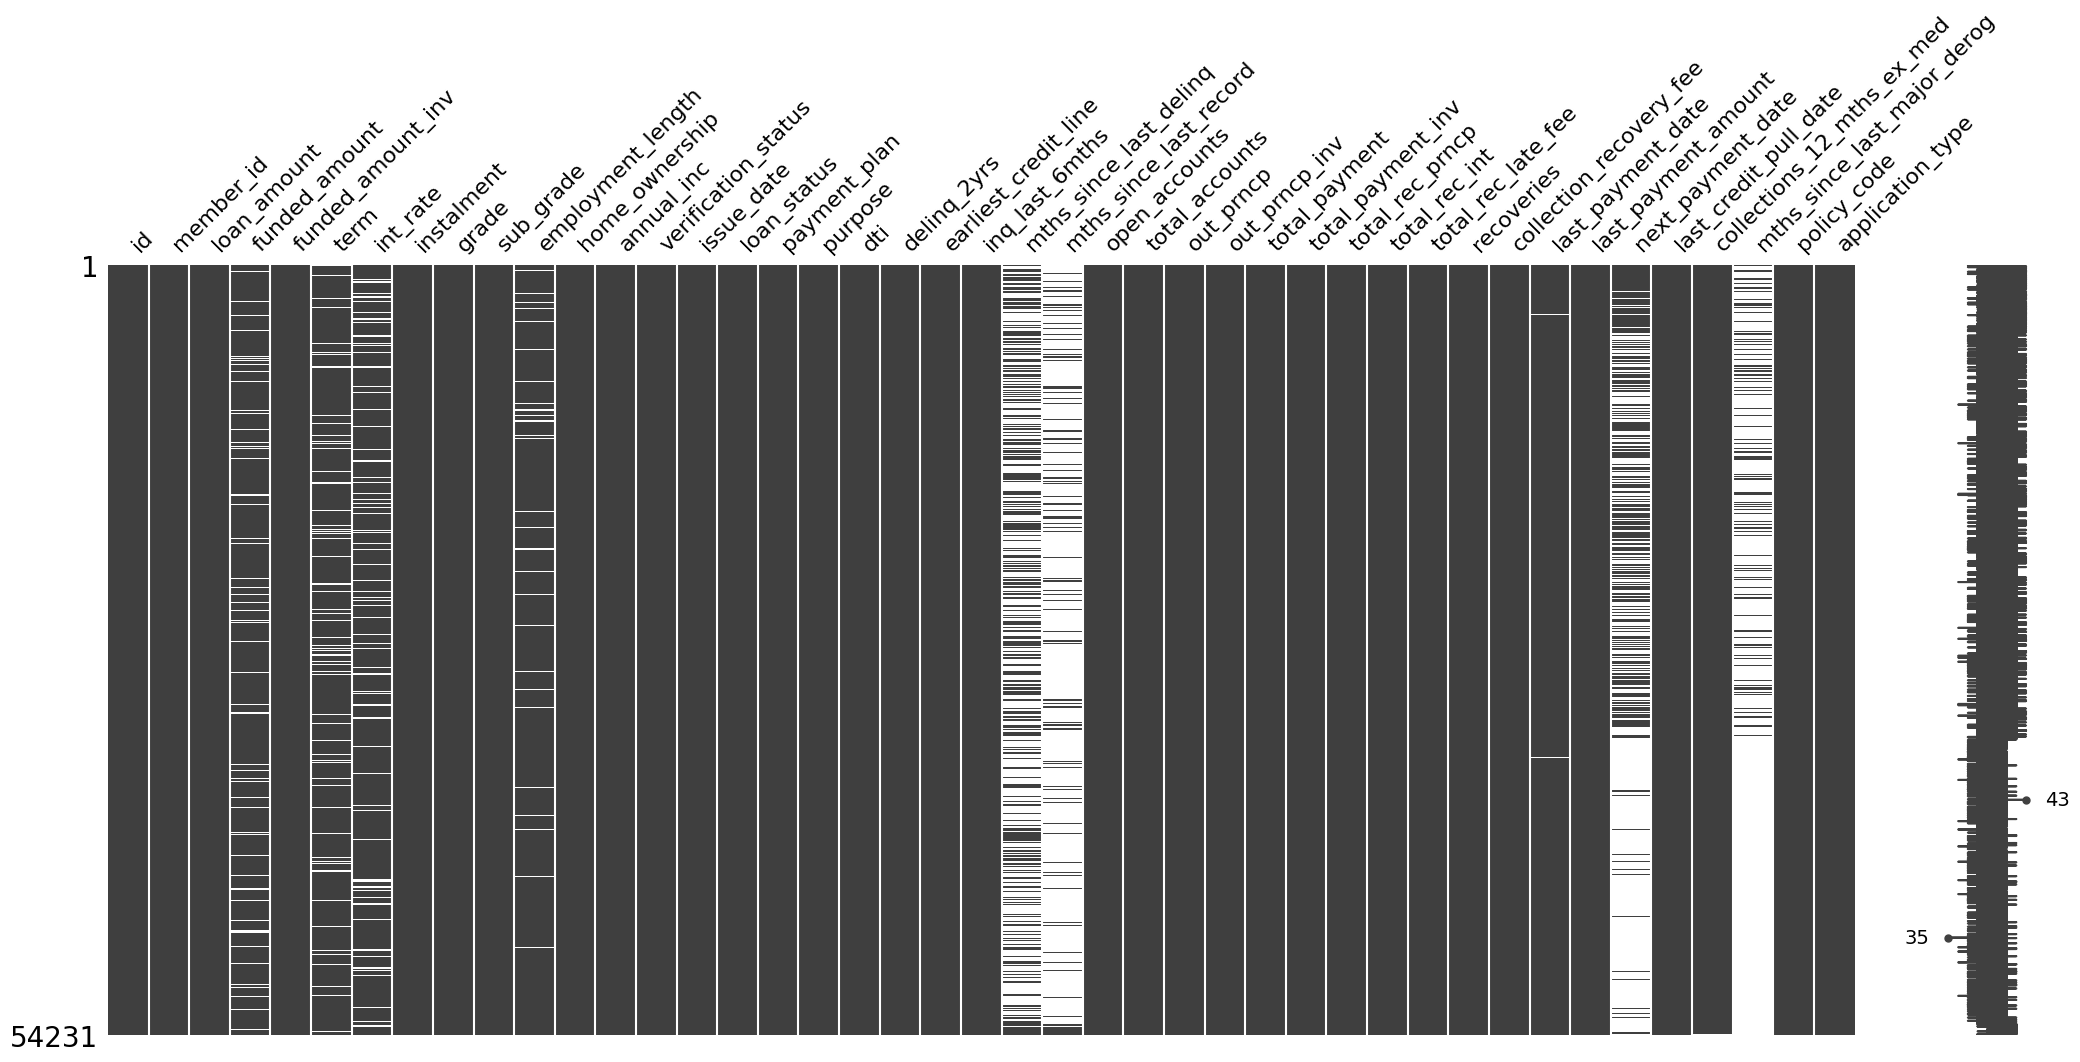

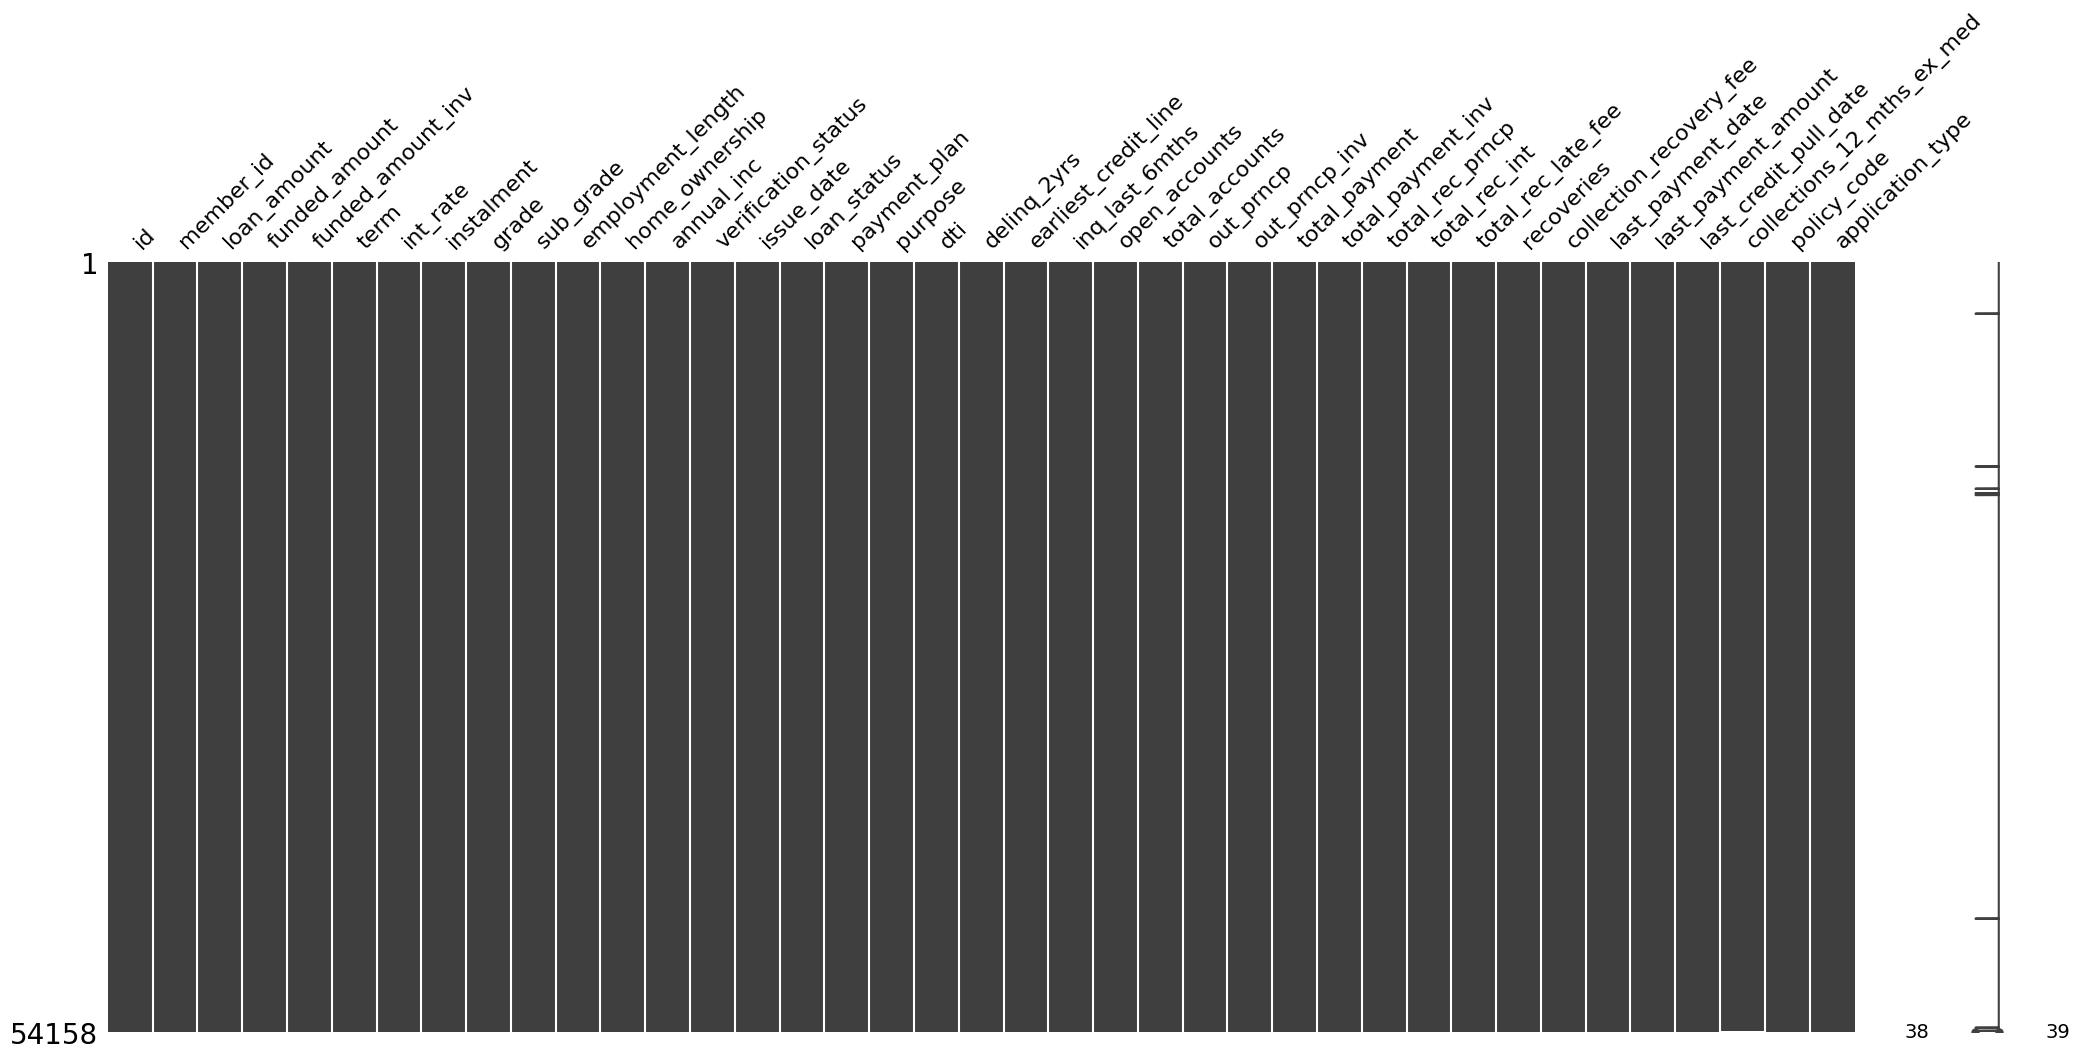

In [1]:
from db_utils import RDSDatabaseConnector
RDS = RDSDatabaseConnector()
from db_utils import DataTransform
DT = DataTransform()
from db_utils import DataFrameInfo
DFI = DataFrameInfo()
from db_utils import amount_of_nulls_and_column_drop
import missingno as msno
from db_utils import DataFrameTransform
DFT = DataFrameTransform()
from db_utils import Plotter
PL = Plotter()

#var2 = RDS.initialise_engine_and_extract_data()
#var3 = RDS.save_dataframe_to_csv()

df = RDS.load_dataframe_from_csv()

'''prints column names
#column_names = []
#for i in df:
#    column_names.append(i)
#print(column_names)'''

symbols = str(input('separate by spaces which columns are to be dropped: ')).split()
list_of_to_categorical = ['term','grade','sub_grade', 'employment_length','home_ownership','verification_status','loan_status','payment_plan','purpose','delinq_2yrs','application_type']
list_of_to_boolean = ['policy_code']
list_of_to_float = []
list_of_to_int = []
dates_to_convert = ['issue_date','earliest_credit_line','last_payment_date','next_payment_date','last_credit_pull_date']

df = DT.excess_symbol_removal(df, symbols)
df = DT.to_categorical(df, list_of_to_categorical)
df = DT.to_boolean(df, list_of_to_boolean)
df = DT.to_float(df, list_of_to_float)
df = DT.to_int(df, list_of_to_int)
df = DT.convert_dates_to_proper_format(df, dates_to_convert)

#DataFrameInfo class method execution.
df = DFI.describe_all_columns_to_check_their_datatypes(df)
df = DFI.extract_statistical_values_median_stddev_mean_from_cols_and_dataframe(df)
df = DFI.count_distinct_values_in_categorical_columns(df)
df = DFI.print_out_the_shape_of_the_dataframe(df)
df = DFI.generate_a_count_slash_percentage_count_of_NULL_values_in_each_column(df)

df = PL.generate_a_plot_for_nulls(df)
df = amount_of_nulls_and_column_drop(df)

df = DFT.impute(df)

df = PL.generate_a_plot_for_nulls(df)
df = amount_of_nulls_and_column_drop(df)

###############################################################################################


In [20]:

from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#sns.heatmap(df.corr(), annot=True)
#plt.show()



'''OLD TRANSFORMATIONS DON'T WORRY ABOUT IT
print('loan_amount',':','skew:',skew(df['loan_amount']))
plt.figure()
sns.displot(df['loan_amount'])

print('funded_amount',':','skew:',skew(df['funded_amount']))
plt.figure()
sns.displot(df['funded_amount'])

print('funded_amount_inv',':','skew:',skew(df['funded_amount_inv']))
plt.figure()
sns.displot(df['funded_amount_inv'])

print('int_rate',':','skew:',skew(df['int_rate']))
plt.figure()
sns.displot(df['int_rate'])

print('annual_inc',':','skew:',skew(df['annual_inc']))
plt.figure()
sns.displot(df['annual_inc'])

print('dti',':','skew:',skew(df['dti']))
plt.figure()
sns.displot(df['dti'])

print('delinq_2yrs',':','skew:',skew(df['delinq_2yrs']))
plt.figure()
sns.displot(df['delinq_2yrs'])

print('inq_last_6mths',':','skew:',skew(df['inq_last_6mths']))
plt.figure()
sns.displot(df['inq_last_6mths'])

print('open_accounts',':','skew:',skew(df['open_accounts']))
plt.figure()
sns.displot(df['open_accounts'])

print('total_accounts',':','skew:',skew(df['total_accounts']))
plt.figure()
sns.displot(df['total_accounts'])

print('out_prncp',':','skew:',skew(df['out_prncp']))
plt.figure()
sns.displot(df['out_prncp'])

print('out_prncp_inv',':','skew:',skew(df['out_prncp_inv']))
plt.figure()
sns.displot(df['out_prncp_inv'])

print('total_payment',':','skew:',skew(df['total_payment']))
plt.figure()
sns.displot(df['total_payment'])

print('total_payment_inv',':','skew:',skew(df['total_payment_inv']))
plt.figure()
sns.displot(df['total_payment_inv'])

print('total_rec_prncp',':','skew:',skew(df['total_rec_prncp']))
plt.figure()
sns.displot(df['total_rec_prncp'])

print('total_rec_int',':','skew:',skew(df['total_rec_int']))
plt.figure()
sns.displot(df['total_rec_int'])

print('total_rec_late_fee',':','skew:',skew(df['total_rec_late_fee']))
plt.figure()
sns.displot(df['total_rec_late_fee'])

print('recoveries',':','skew:',skew(df['recoveries']))
plt.figure()
sns.displot(df['recoveries'])

print('collection_recovery_fee',':','skew:',skew(df['collection_recovery_fee']))
plt.figure()
sns.displot(df['collection_recovery_fee'])

print('last_payment_amount',':','skew:',skew(df['last_payment_amount']))
plt.figure()
sns.displot(df['last_payment_amount'])

print('collections_12_mths_ex_med',':','skew:',skew(df['collections_12_mths_ex_med']))
plt.figure()
sns.displot(df['collections_12_mths_ex_med'])

print('policy_code',':','skew:',skew(df['policy_code']))
plt.figure()
sns.displot(df['policy_code'])

'''

'''LIST OF AVAILABLE TRANSFORMATIONS
#df['instalment'] = np.log(df['instalment'])
#df['instalment'] = boxcox(df['instalment'])[0]
#df['instalment'] = np.sqrt(df['instalment'])
#df['instalment'] = np.cbrt(df['instalment'])
#df['instalment'] = yeojohnson(df['instalment'])[0]
'''

list = ['loan_amount','funded_amount','funded_amount_inv','int_rate', 'instalment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_accounts','total_accounts','out_prncp','out_prncp_inv','total_payment','total_payment_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_payment_amount']
list2=['policy_code']
list3=['collections_12_mths_ex_med']
for i in list:
    ### PRE-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
    df[i] = yeojohnson(df[i])[0]
    ###POST-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
'''
for i in list2:
    ### PRE-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
    df[i] = yeojohnson(df[i])[0]
    ###POST-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
    
for i in list3:
    ### PRE-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
    df[i] = yeojohnson(df[i])[0]
    ###POST-TRANSFORMATION PRINTOUTS
    print(i,':','skew:',skew(df[i]))
    #plt.figure()
    #sns.displot(df[i])
'''
#just use yeo johnson and only use it once per column
#get as close to 0 as possible, figure out the logic of that later tho.

loan_amount : skew: -0.04412565977406085
loan_amount : skew: -0.04412566013312637
funded_amount : skew: -0.03443923536258853
funded_amount : skew: -0.03443926001811244
funded_amount_inv : skew: -0.042690370982970204
funded_amount_inv : skew: -0.042690300686222565
int_rate : skew: -0.015588118669630485
int_rate : skew: -0.01558811098843574
instalment : skew: -0.023305682591620826
instalment : skew: -0.023305657284145867
annual_inc : skew: 0.01317364547739058
annual_inc : skew: 0.013173685330764382
dti : skew: -0.09342654515010784
dti : skew: -0.09342651509118917
delinq_2yrs : skew: 1.8694112937754646
delinq_2yrs : skew: 1.8694112937754659
inq_last_6mths : skew: 0.00814791397702007
inq_last_6mths : skew: 0.007205736173770652
open_accounts : skew: 0.002884659145833048
open_accounts : skew: 0.002884585462693361
total_accounts : skew: -0.01643109688192585
total_accounts : skew: -0.016431079533443155
out_prncp : skew: 0.5196746944061048
out_prncp : skew: 0.5196746943910685
out_prncp_inv : sk

C:\Users\james\AppData\Local\Temp\ipykernel_3280\3612551074.py:128: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(i,':','skew:',skew(df[i]))


TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

<h3>(0) - Load the column names</h3>

<h3>(1) - Removal of symbols </h3>

<h3>(2) - Numerical to Categorical</h3>

<h3>(3) - Numerical to Boolean</h3>

<h3>(4) - Categorical to Boolean</h3>

<h3>(5) - int to float</h3>

<h3>(6) - float to int</h3>

<h3>(7) - Convert Dates to Proper Format</h3>

<h3>(8) - Describe all columns to check their datatypes</h3>

<h3>(9) - extract statistical values median stddev mean from cols and dataframe</h3>

<h3>(10) - Count distinct values in categorical columns</h3>

<h3>(11) - print out the shape of the dataframe</h3>

<h3>(12) - Generate a count slash percentage count of null values in each column</h3>

<h3>(13) - </h3>